In [1]:
import numpy as np
import xarray as xr
import glob, os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import copy
%matplotlib inline

In [2]:
# PHASE = 'Summer'
PHASE = 'Winter'

run_name = 'OBS'

indir = f'/pscratch/sd/f/feng045/DYAMOND/OLR_Precipitation_combined/'
infile = f'{indir}{PHASE}_{run_name}_validcount.nc'

figdir = f'/global/cfs/cdirs/m1867/zfeng/MCSMIP/DYAMOND/{PHASE}/figures/MCSMIP/'
os.makedirs(figdir, exist_ok=True)
print(figdir)
print(f'{infile} exists: {os.path.isfile(infile)}')

/global/cfs/cdirs/m1867/zfeng/MCSMIP/DYAMOND/Winter/figures/MCSMIP/
/pscratch/sd/f/feng045/DYAMOND/OLR_Precipitation_combined/Winter_OBS_validcount.nc exists: True


In [3]:
# Read data
ds = xr.open_dataset(infile)
lon = ds.lon
lat = ds.lat
ds

<xarray.Dataset>
Dimensions:      (lat: 1200, lon: 3600)
Coordinates:
  * lon          (lon) float64 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.8 179.9
  * lat          (lat) float64 -59.95 -59.85 -59.75 -59.65 ... 59.75 59.85 59.95
Data variables:
    valid_count  (lat, lon) int64 ...
Attributes:
    title:         Winter OBS valid Tb data counts
    total_ntimes:  960
    contact:       Zhe Feng, zhe.feng@pnnl.gov
    created_on:    Wed Mar 27 09:44:31 2024

In [4]:
# Calculate valid data fraction
valid_frac = 100 * ds.valid_count / ds.attrs['total_ntimes']

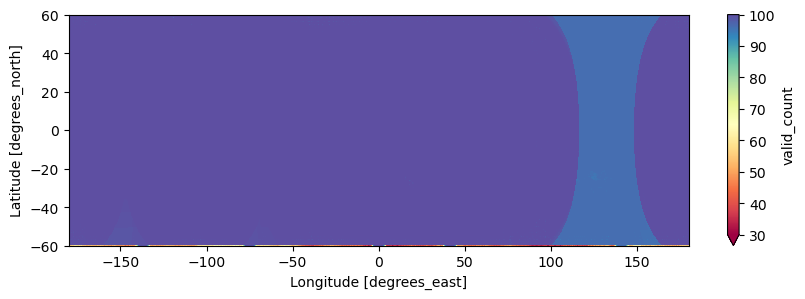

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10,3), dpi=100)
valid_frac.plot(vmin=30, vmax=100, cmap='Spectral', ax=ax)

/global/cfs/cdirs/m1867/zfeng/MCSMIP/DYAMOND/Winter/figures/MCSMIP/Winter_OBS_tb_validfraction.png


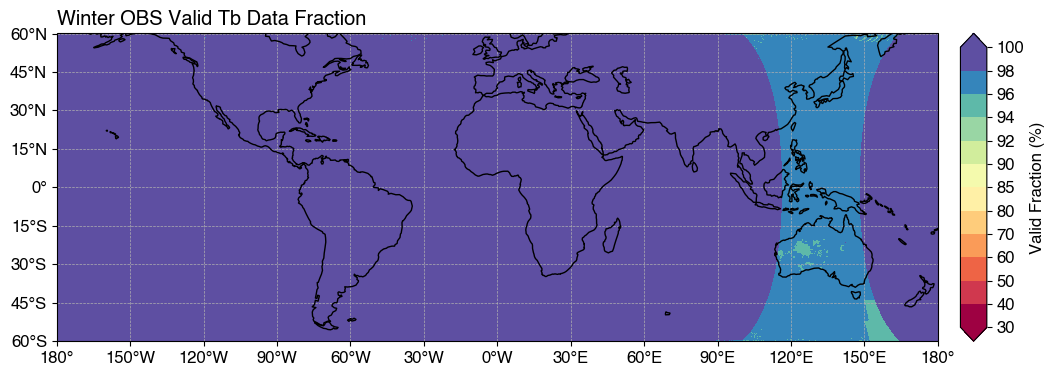

In [6]:
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'Helvetica'

title = f'{PHASE} {run_name} Valid Tb Data Fraction'
levels = [30,40,50,60,70,80,85,90,92,94,96,98,100]
cbticks = levels
# levels = np.arange(30, 101, 5)
# cbticks = np.arange(30, 101, 10)
cmap = 'Spectral'

map_extent = [-180., 179.5, -60.1, 60.1]
lonv = np.arange(-180,180.1,30)
latv = np.arange(-60,60.1,15)
proj = ccrs.PlateCarree(central_longitude=0)
data_proj = ccrs.PlateCarree()

fig = plt.figure(figsize=[12,4], dpi=100)
gs = gridspec.GridSpec(1,2, height_ratios=[1], width_ratios=[1,0.03], wspace=0.05, hspace=0)

resolution = '110m'
land = cfeature.NaturalEarthFeature('physical', 'land', resolution)
ocean = cfeature.NaturalEarthFeature('physical', 'ocean', resolution)
borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', resolution)

ax = plt.subplot(gs[0], projection=proj)
ax.set_extent(map_extent, crs=proj)
ax.add_feature(land, facecolor='none', edgecolor='k', zorder=3)
ax.set_title(title, loc='left')
ax.set_aspect('auto', adjustable=None)
# Grid line    
gl = ax.gridlines(crs=proj, draw_labels=False, linestyle='--', linewidth=0.5)
gl.xlocator = mpl.ticker.FixedLocator(lonv)
gl.ylocator = mpl.ticker.FixedLocator(latv)
ax.set_xticks(lonv, crs=data_proj)
ax.set_yticks(latv, crs=data_proj)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

Zm = np.ma.masked_where(np.isnan(valid_frac), valid_frac)
cmap = copy.copy(mpl.colormaps.get_cmap(cmap))
norm = colors.BoundaryNorm(boundaries=levels, ncolors=cmap.N)
cf1 = ax.pcolormesh(lon, lat, Zm, shading='auto', norm=norm, cmap=cmap, transform=data_proj, zorder=2)

# Colorbars
cblabels = 'Valid Fraction (%)'
cax1 = plt.subplot(gs[1])
cb1 = plt.colorbar(cf1, cax=cax1, label=cblabels, ticks=cbticks, orientation='vertical', extend='both')

figname = f'{figdir}{PHASE}_{run_name}_tb_validfraction.png'
fig.savefig(figname, dpi=300, bbox_inches='tight', facecolor='w')
print(figname)